In [20]:
suppressWarnings(suppressPackageStartupMessages(library(ggthemes)))
suppressWarnings(suppressPackageStartupMessages(library(scran)))

[1] "#344d90" "#5cc5ef" "#ffb745" "#e7552c"

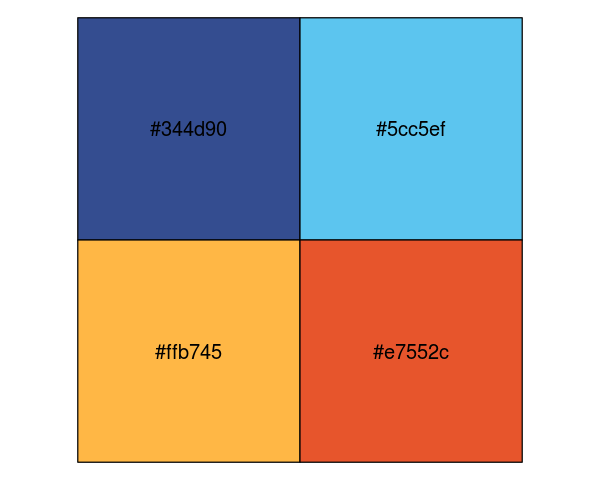

In [11]:
require("scales")
show_col(canva_pal("Pool party")(4))
canva_pal("Pool party")(4)

In [12]:
col_day0 = canva_pal("Pool party")(4)[1]
col_day1 = canva_pal("Pool party")(4)[2]
col_day2 = canva_pal("Pool party")(4)[3]
col_day3 = canva_pal("Pool party")(4)[4]
col_ips = "cornflowerblue"
col_mesendo = "forestgreen"
col_defendo = "coral"

In [24]:
# load lead variant results sc stages (iPS, mesendo, defendo)
leads.ips = read.csv("/nfs/leia/research/stegle/acuomo/mean/day0/all_expts/leads.csv", row.names = 1)
leads.mesendo = read.csv("/nfs/leia/research/stegle/acuomo/mean/mesendo_est_June20/leads.csv", row.names = 1)
leads.defendo = read.csv("/nfs/leia/research/stegle/acuomo/mean/defendo_est_June20/leads.csv", row.names = 1)
# load lead variant results sc days as comparison (day1, day3)
leads.day1 = read.csv("/nfs/leia/research/stegle/acuomo/mean/day1/leads.csv", row.names = 1)
leads.day3 = read.csv("/nfs/leia/research/stegle/acuomo/mean/day3/leads.csv", row.names = 1)

In [25]:
leads.ips.sign = leads.ips[leads.ips$global_corr_p_value < 0.1,]
leads.mesendo.sign = leads.mesendo[leads.mesendo$global_corr_p_value < 0.1,]
leads.defendo.sign = leads.defendo[leads.defendo$global_corr_p_value < 0.1,]
#
leads.day1.sign = leads.day1[leads.day1$global_corr_p_value < 0.1,]
leads.day3.sign = leads.day3[leads.day3$global_corr_p_value < 0.1,]

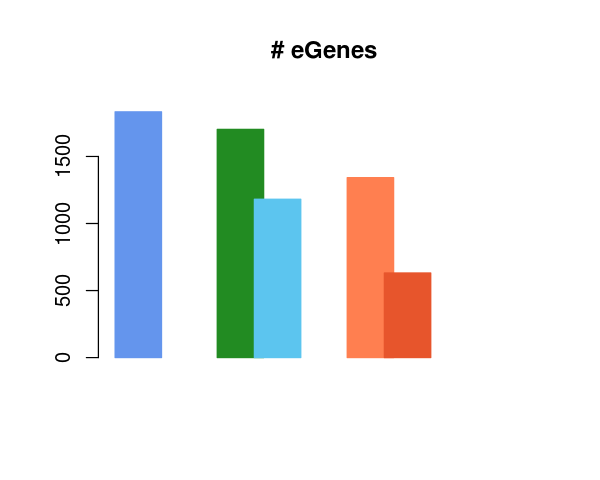

In [27]:
options(repr.plot.width = 5, repr.plot.height = 4)
# eqtls <- c(1833, 1702, 1181, 1342, 631)
eqtls <- c(nrow(leads.ips.sign), nrow(leads.mesendo.sign), nrow(leads.day1.sign), 
           nrow(leads.defendo.sign), nrow(leads.day3.sign))

my.xlim = c(0, max(eqtls)+100)
my.ylim = c(0,9)
my.space = c(0, 1.2, -0.2, 1, -0.2)
# opar <- par(lwd = 5)
barplot(as.numeric(eqtls), main = "# eGenes",
        border = c(col_ips, col_mesendo, col_day1, col_defendo, col_day3),
        col = c(col_ips, col_mesendo, col_day1, col_defendo, col_day3),
        xlim = my.ylim, ylim = my.xlim, space = my.space, ylab = "")

In [18]:
sce = readRDS("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20180618/sce_merged_afterqc_filt_allexpts.rds")

In [21]:
## HVGs (highly variable genes)
sce = normalize(sce)
design = model.matrix(~ experiment, data = colData(sce))
alt.fit = trendVar(sce, design = design, use.spikes = FALSE)
alt.decomp = decomposeVar(sce, alt.fit)

Warning message in .local(object, ...):
“spike-in transcripts in 'ERCC' should have their own size factors”

In [22]:
top.500hvgs = rownames(alt.decomp[order(alt.decomp$bio, decreasing = TRUE),])[1:500]
rowData(sce)$is_intop500hvg <- (rownames(sce) %in% top.500hvgs)
pca.500hvgs = prcomp(t(logcounts(sce[rowData(sce)$is_intop500hvg,])))$x
sce$PC1_top500hvgs = pca.500hvgs[,1]
# some cells will not be assigned to any stage
sce$stage = "not assigned"
# just assign all day0 cells to ips
sce[,sce$day == "day0"]$stage = "ips"
# still based on not scale PC1, since those are the criteria used for eQTLs
sce[,sce$PC1_top500hvgs  > -23 & sce$PC1_top500hvgs < 4 & sce$day %in% c("day1","day2")]$stage = "mesendo"
sce[,sce$PC1_top500hvgs  > 22 & sce$day %in% c("day2","day3")]$stage = "defendo"
sce$pseudotime = sce$PC1_top500hvgs

In [23]:
sce_ips = sce[,sce$stage == "ips"]
sce_mesendo = sce[,sce$stage == "mesendo"]
sce_defendo = sce[,sce$stage == "defendo"]
###
sce_day1 = sce[,sce$day == "day1"]
sce_day3 = sce[,sce$day == "day3"]

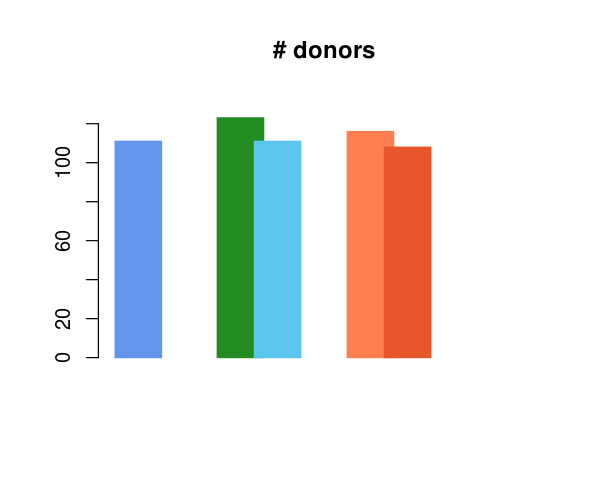

In [28]:
options(repr.plot.width = 5, repr.plot.height = 4)
# donors <- c(111, 123, 111, 116, 108)
donors <- c(length(unique(sce_ips$donor)), length(unique(sce_mesendo$donor)), length(unique(sce_day1$donor)), 
           length(unique(sce_defendo$donor)), length(unique(sce_day3$donor)))

my.xlim = c(0, max(donors)+10)
my.ylim = c(0,9)
my.space = c(0, 1.2, -0.2, 1, -0.2)

# opar <- par(lwd = 5)
barplot(as.numeric(donors), main = "# donors",
        border = c(col_ips, col_mesendo, col_day1, col_defendo, col_day3),
        col = c(col_ips, col_mesendo, col_day1, col_defendo, col_day3),
        xlim = my.ylim, ylim = my.xlim, space = my.space, ylab = "")

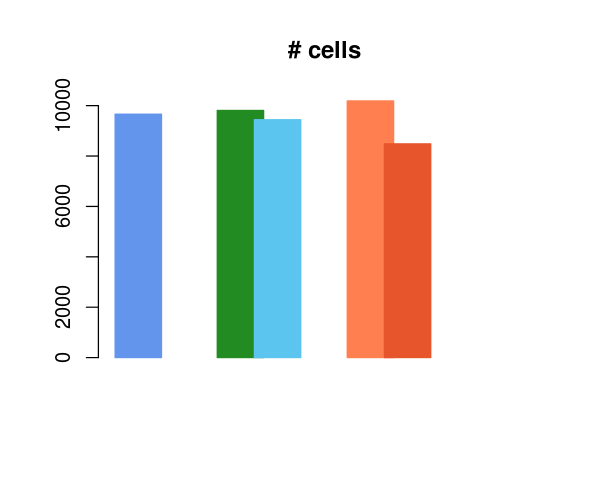

In [29]:
options(repr.plot.width = 5, repr.plot.height = 4)
#cells <- c(9661, 9809, 9443, 10187, 8485)
cells <- c(ncol(sce_ips), ncol(sce_mesendo), ncol(sce_day1), ncol(sce_defendo), ncol(sce_day3))

my.xlim = c(0, max(cells) + 100)
my.ylim = c(0,9)
my.space = c(0, 1.2, -0.2, 1, -0.2)

# opar <- par(lwd = 5)
barplot(as.numeric(cells), main = "# cells",
        border = c(col_ips, col_mesendo, col_day1, col_defendo, col_day3),
        col = c(col_ips, col_mesendo, col_day1, col_defendo, col_day3),
        xlim = my.ylim, ylim = my.xlim, space = my.space, ylab = "")